<a href="https://colab.research.google.com/github/pinghu/learning/blob/master/Copy_of_Collab_ST_Day1_v4_crippled_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to make a scatter plot, and how to iteratively make a better one.
### Spatial transcriptomics coding exercise 1 -- UCLA Collaboratory
Fangming Xie

November 2022


Dataset:
Vizgen Data Release V1.0. May 2021



In [ ]:
## Install and import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('talk')

In [ ]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
  """ rotate data points defined by `x` and `y` by `theta` degree
  """
  a = np.vstack([x,y]).T
  if unit == 'degree':
    theta = theta*np.pi/180 # convert to radian

  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  ar = a.dot(R.T)
  return ar[:,0], ar[:,1]

### Iteration 1: make a minimalist scatter plot
Pretending each dot is a cell, so this plot shows their locations in space!

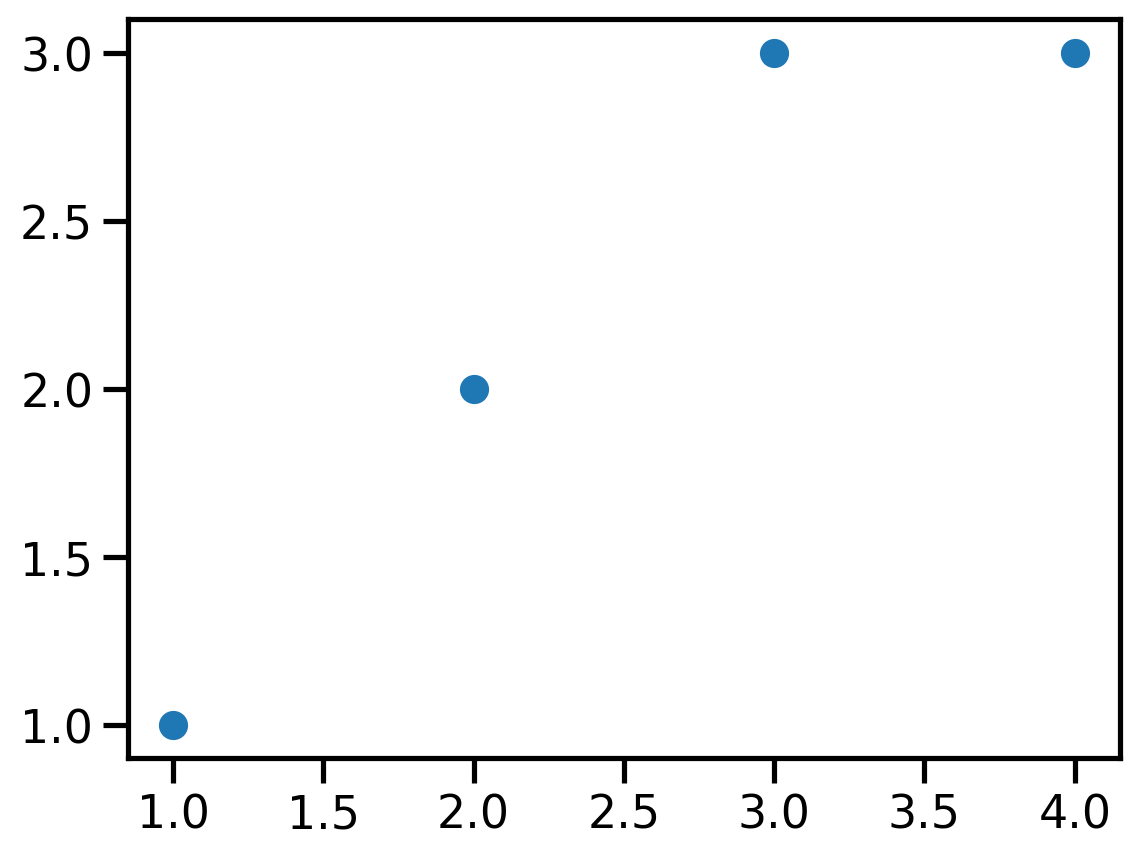

In [ ]:
x = [1,2,3,4]
y = [1,2,3,3]

plt.scatter(x, y)

### Iteration 2: add a color for each dot
The colors could represent the gene expression levels for each cell -- now it's spatial transcriptomics!

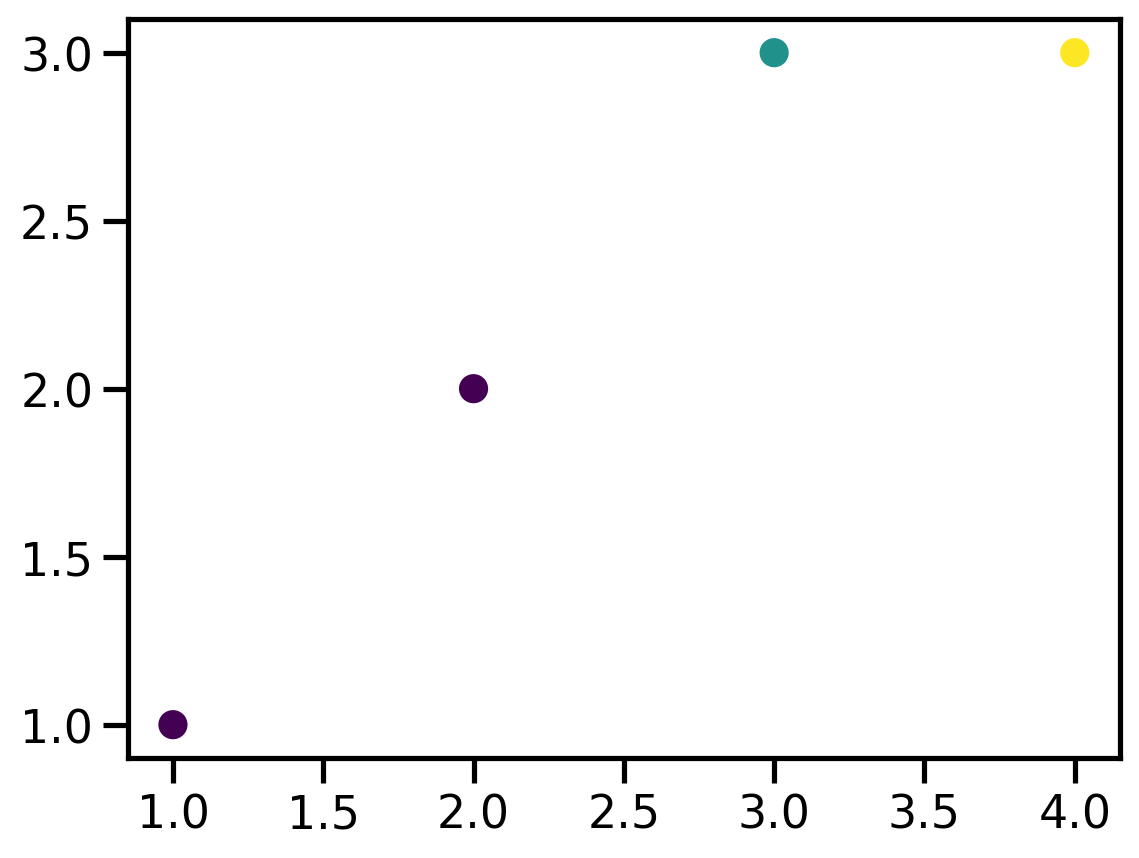

In [ ]:
x = [1,2,3,4]
y = [1,2,3,3]
gene = [0,0,1,2]
#colormap = numpy.array(['r', 'g', 'b'])

# make the change here
plt.scatter(x, y, c=gene)

### Iteration 3: add a color bar and tune figure size
Display of colors should always be accompanied by a colorbar.

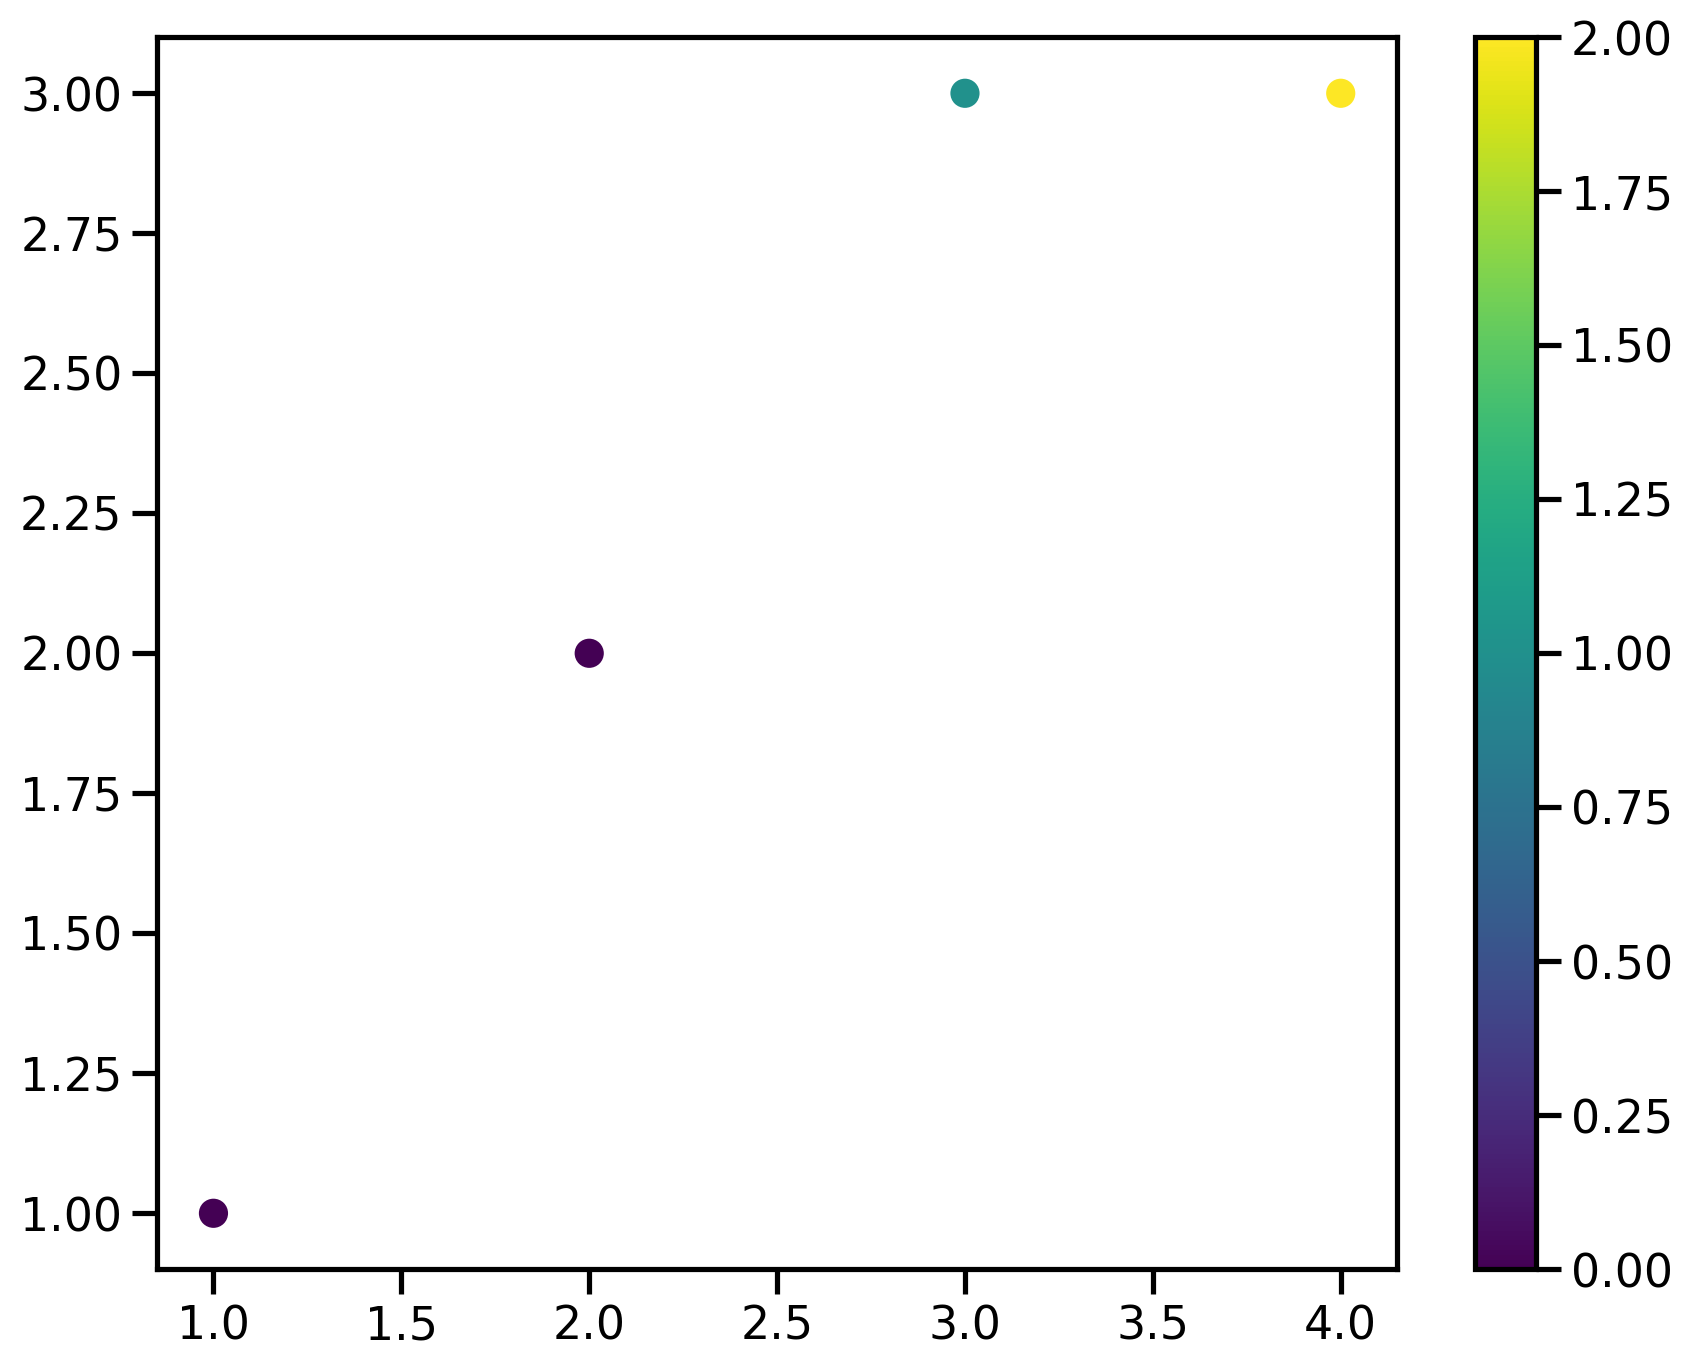

In [ ]:
# modify the following code to make it work

fig, ax = plt.subplots(figsize=(10,8))
g = ax.scatter(x, y, c=gene)
fig.colorbar(g)

### Iteration 4: Make the plot using REAL data

### Load data
- Prior to running the next code cell, download the data using this link:
https://drive.google.com/file/d/1zUHtd171abXdFfrVIsdzq2_R92jpIoQr/view?usp=sharing
- Upload the downloaded file to the Google Colab using the side bar on the left.

### Making the plot
- how to get the information we need from the data table?
- Using one gene as an example: `Slc17a7`

*The data is adapted from the original data source: Vizgen Data Release V1.0. May 2021*

In [ ]:
f = '/content/vizgen_mouse_brain_S2R2.csv.gz'
data = pd.read_csv(f, index_col=0)
data

,x,y,Oxgr1,Htr1a,Htr1b,Htr1d,Htr1f,Htr2a,Htr2b,Htr2c,...,Pdgfrb,Ptk7,Ret,Ror1,Ror2,Ros1,Ryk,Tek,Tie1,Tyro3
0,594.918018,5628.150243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0
1,576.450018,5762.286246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0
2,564.462017,5721.624245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,538.164017,5605.475642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,610.362018,5652.936244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84167,9235.566329,3349.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
84168,9225.738329,3261.654105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
84169,9230.976329,3287.358106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
84170,9236.754329,3364.956108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


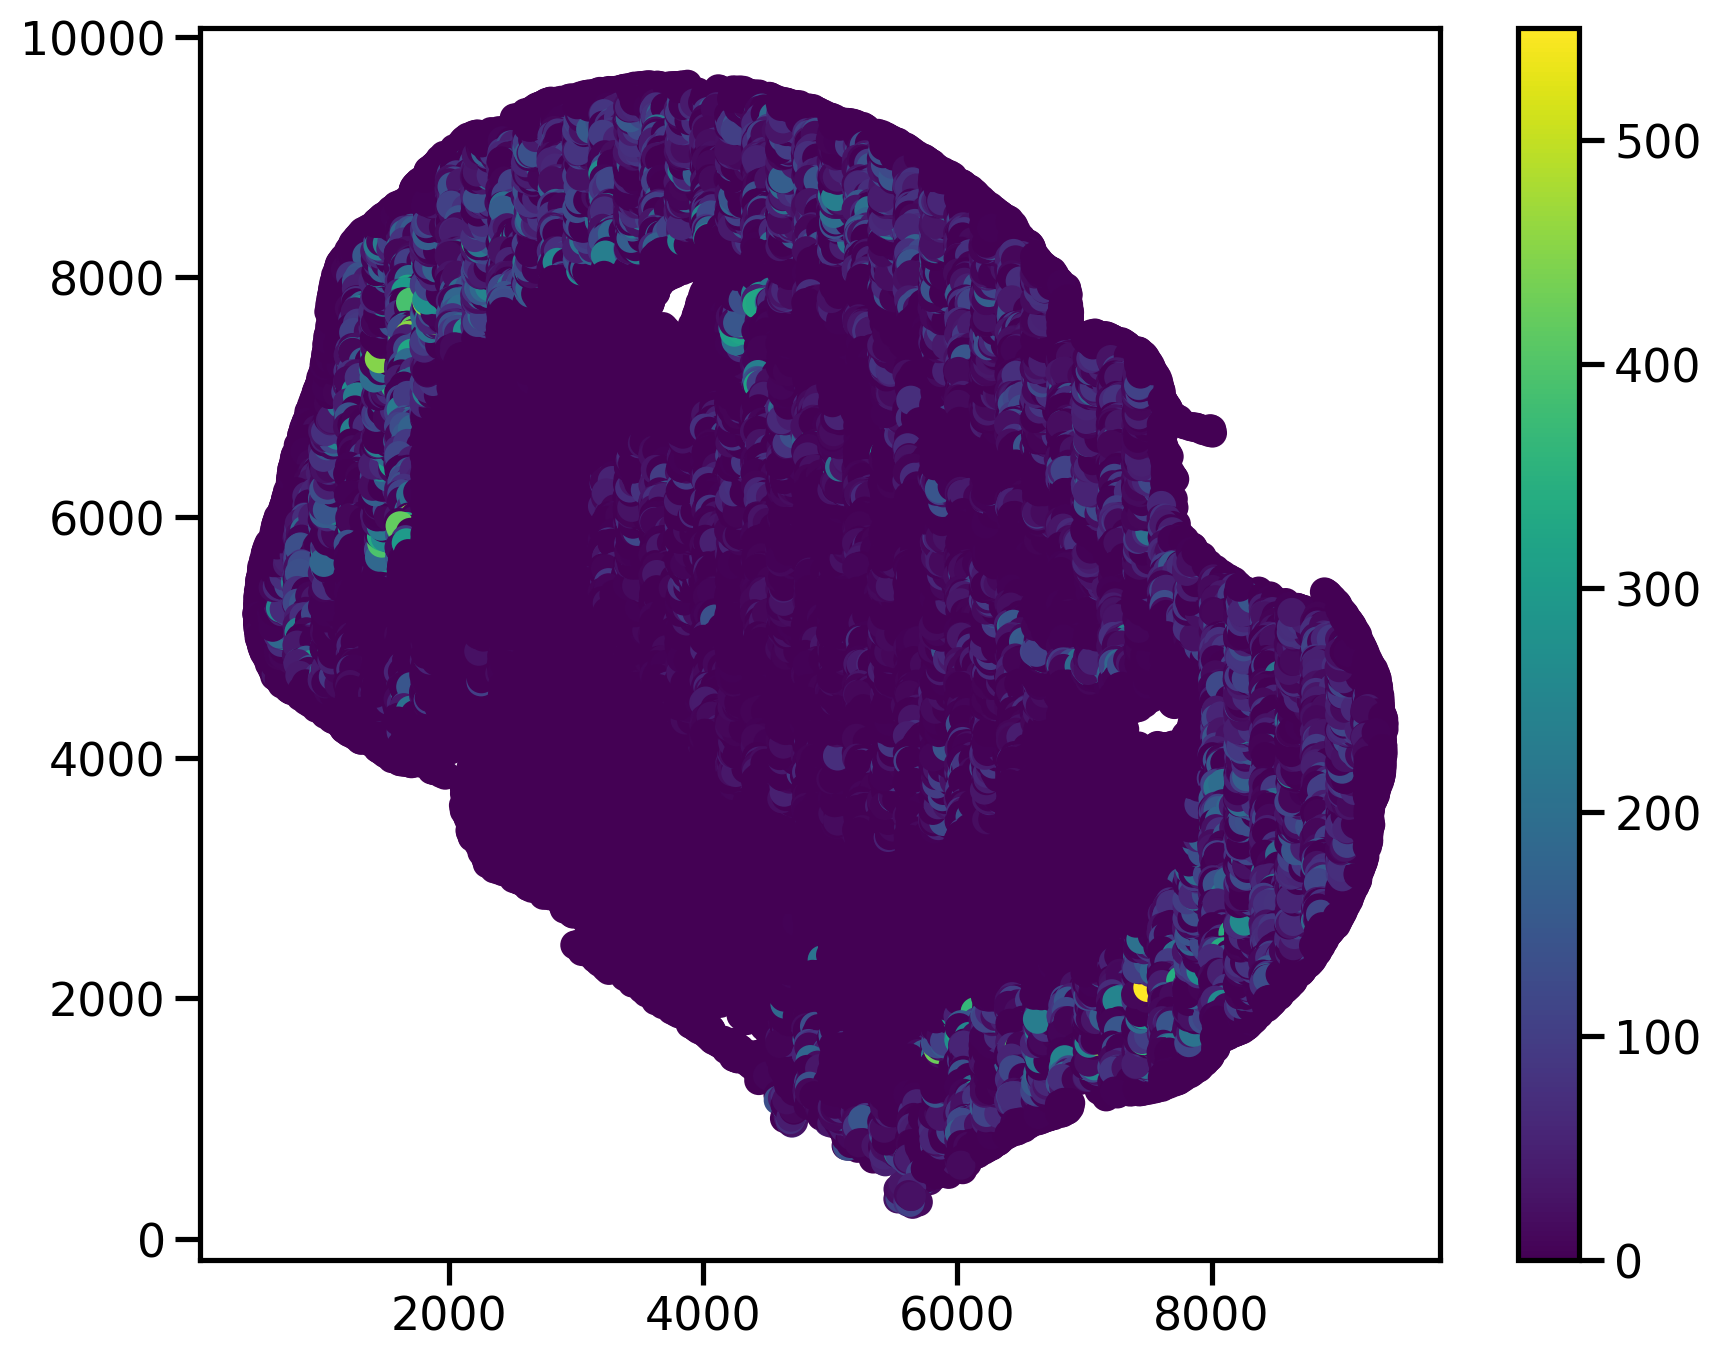

In [ ]:
# try making the plot using real data here
x=data['x']
y=data['y']
genename='Slc17a7'
gexp=data[genename]
fig, ax = plt.subplots(figsize=(10,8))
g = ax.scatter(x, y, c=gexp)
fig.colorbar(g)




### Pause and Ponder -- why does the real data doesn't look good?
- too many dots? too crowded? figure not big enough?
- range of gene expression?
- how can we fix them? Try it!

ValueError: ignored

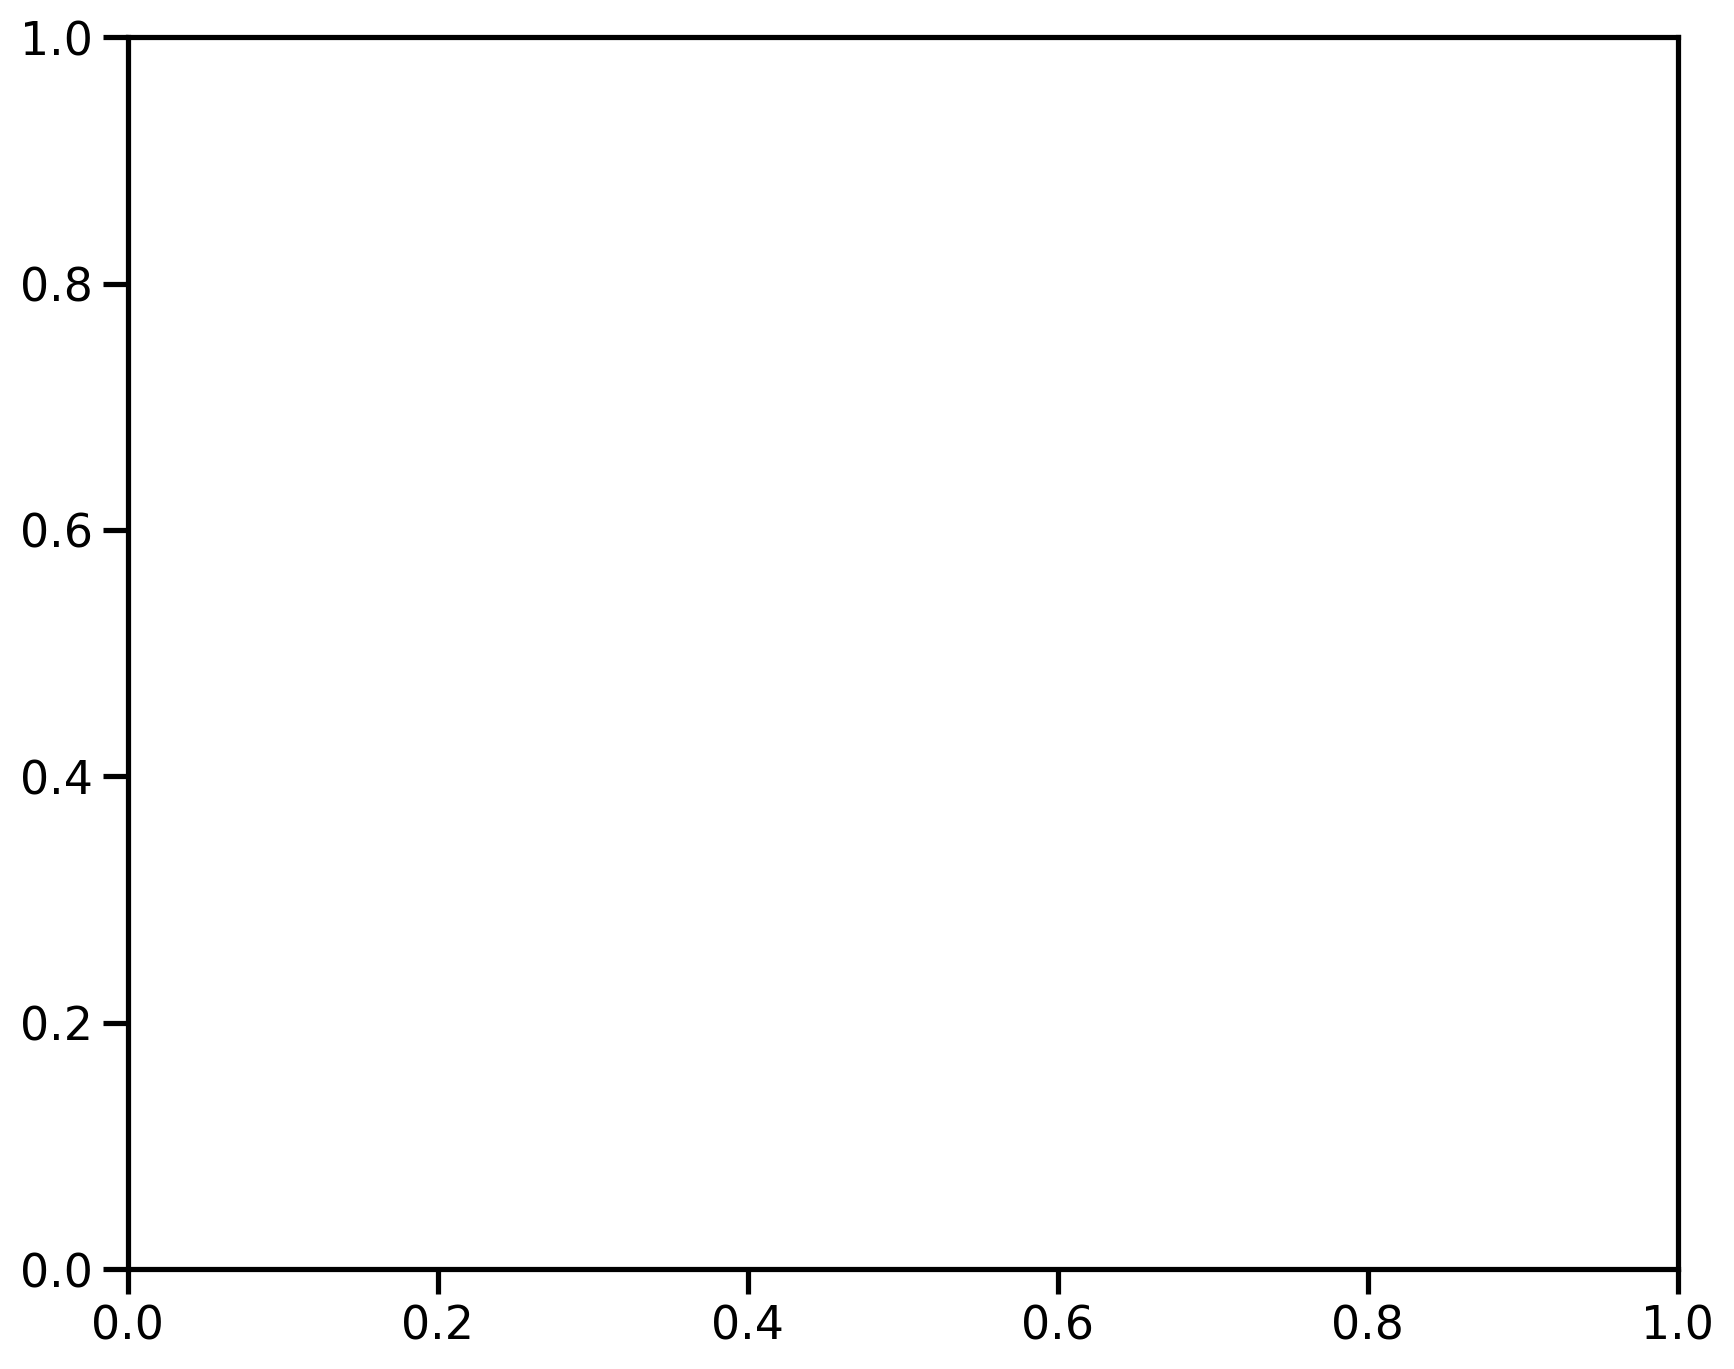

In [ ]:
from pickle import NONE
# try investigate the problems and fixing the plot here!
# try making the plot using real data here

fig, ax = plt.subplots(figsize=(10,8))
g = ax.scatter(x, y, c=gexp,s=1,edgecolors=NONE)
fig.colorbar(g)